In [1]:
import pandas as pd
import numpy as np

In [3]:
column_names = ('user_id item_id rating timestamp').split()

In [5]:
# importing the data
df = pd.read_csv('u.data', sep='\t', names = column_names)

In [7]:
# check the data
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [8]:
# create a set with the movie titles
movie_titles = pd.read_csv('Movie_Id_Titles')

In [14]:
# merge the movie title into our data frame
df = pd.merge(df, movie_titles, on='item_id')

In [15]:
df.head()

,user_id,item_id,rating,timestamp,title_x,title_y,title
0,0,50,5,881250949,Star Wars (1977),Star Wars (1977),Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977),Star Wars (1977),Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977),Star Wars (1977),Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977),Star Wars (1977),Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977),Star Wars (1977),Star Wars (1977)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [21]:
# check the most rated movies
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [23]:
# check the movies with more ratings
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [24]:
# create a data frame with the average rating by movie
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [26]:
# create a new column with the number of ratings by movie
ratings['num of ratings'] = df.groupby('title')['rating'].count()

In [27]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


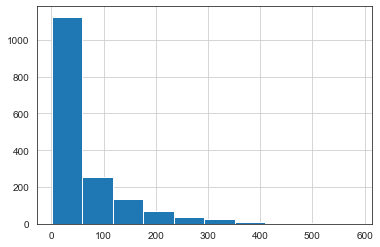

In [29]:
# visualize how the number of ratings is distributed
ratings['num of ratings'].hist()

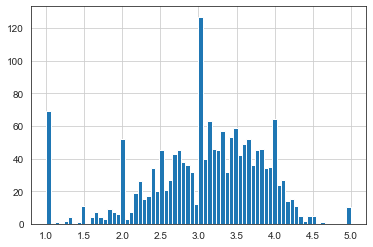

In [30]:
# visualize how ratings is distributed
ratings['rating'].hist(bins = 70)

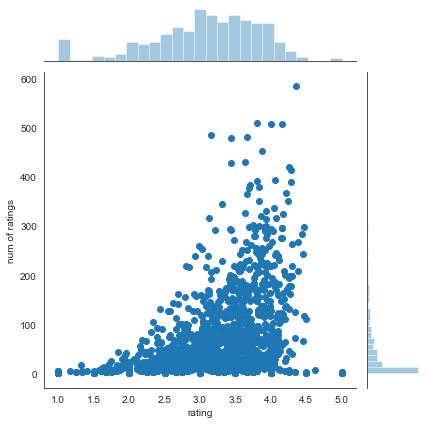

In [31]:
# visualize how the rating is correlated with the number of ratings
sns.jointplot(ratings['rating'], ratings['num of ratings'], data = ratings)